files
* mokapot res files
    * CTCF_100bp_small_5_L.mokapot.psms.txt
    * CTCF_100bp_small_5_L.mokapot.m6a_fiberseq.txt
* pin file: CTCF_m6a_fiberseq_merged_100bp_features-small_L_5.pin
* feature files
    * CTCF_m6a_fiberseq_L_100bp_small_5_negative_features.txt
    * pos: CTCF_m6a_fiberseq_merged_100bp_positive_features.pin
    * neg: CTCF_m6a_fiberseq_L_100bp_small_5_negative_features.pin
* fiberseq files:
    * pos: CTCF_m6a_fiberseq_merged_100bp_positive.txt
    * neg: CTCF_m6a_fiberseq_L_100bp_small_5_negative.txt

<br>__accidentally used MERGED positive data__

# CTCF L (merged pos, 5% neg L)

In [1]:
library(ggplot2)
library(data.table)
library(dplyr)
library(tictoc)
library(ggsci)
library(purrr)


Attaching package: 'dplyr'


The following objects are masked from 'package:data.table':

    between, first, last


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'tictoc'


The following object is masked from 'package:data.table':

    shift



Attaching package: 'purrr'


The following object is masked from 'package:data.table':

    transpose




In [2]:
while (!is.null(dev.list()))  dev.off()
rm(list=ls())

#------------ Helper Functions ------------
# Initiate PDF
openPDF <- function (output_file_fh, pdf_dims) {
  print(sprintf("Saving plots to: %s", output_file_fh))
  # Open PDF
  pdf(output_file_fh, width = pdf_dims[1], height = pdf_dims[2],
      useDingbats=FALSE, family = "ArialMT")
}

# Close PDF
closePDF <- function () {
  while (!is.null(dev.list()))  dev.off()
  print("File saved.")
}

In [3]:
#------------ Define dirs ------------
setwd("/mmfs1/gscratch/stergachislab/mwperez/ctcf-footprinting")

#ARGS
data_folder <- sprintf("%s/candidate_footprints", getwd())
mokapot_dir <- sprintf("%s/mokapot_res", getwd())
output_folder <- sprintf("%s/figures", mokapot_dir)

# formatting data

In [4]:
# set args
motif_type <- "L"
file_root <- "100bp_small_5_L"
ctcf_dist <- c(-100,100)
n_rows <- Inf

# load set data file
data_file_name <- sprintf("CTCF_%s.mokapot.m6a_fiberseq.txt", file_root)
data_file <- sprintf("%s/%s", mokapot_dir, data_file_name)
print(data_file)

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/mokapot_res/CTCF_100bp_small_5_L.mokapot.m6a_fiberseq.txt"


In [29]:
# read table
df <- fread(data_file, nrows=n_rows)
sprintf("m6a rows: %s", format(dim(df)[1], big.mark=",", scientific=FALSE))

# filter centered_position_type for m6a
df <- filter(df, centered_position_type == "m6a")
sprintf("m6a rows: %s", format(dim(df)[1], big.mark=",", scientific=FALSE))

[1] "m6a rows: 40,322,114"

[1] "m6a rows: 40,322,114"

In [30]:
df <- df %>%
    mutate(Label = ifelse(Label == 1, "Positive", "Negative"))

table(df$Label)


Negative Positive 
 8040195 32281919 

In [31]:
df$FDR_05 <- ifelse(df$FDR < 0.05, "low_FDR", "high_FDR")
df$FDR_01 <- ifelse(df$FDR < 0.01, "low_FDR", "high_FDR")
df$FDR_001 <- ifelse(df$FDR < 0.001, "low_FDR", "high_FDR")
df$FDR_0001 <- ifelse(df$FDR < 0.0001, "low_FDR", "high_FDR")

In [32]:
# unique CTCF motifs, queries, & motif_queries
sprintf("unique motifs: %s", format(length(unique(df$motif_name)), big.mark=",", scientific=FALSE))
sprintf("unique queries: %s", format(length(unique(df$query_name)), big.mark=",", scientific=FALSE))
sprintf("unique motif-query groups: %s", format(length(unique(df$motif_query)), big.mark=",", scientific=FALSE))

[1] "unique motifs: 277,050"

[1] "unique queries: 821,816"

[1] "unique motif-query groups: 1,145,817"

In [36]:
df_og <- df

In [33]:
table(df$Label)


Negative Positive 
 8040195 32281919 

## m6a fiberseq density plots

### grouped pos & neg sets

In [34]:
#------------ Set output file ------------
output_file_name <- sprintf("CTCF_%s.mokapot.m6a_fiberseq_density-all.pdf", file_root)
output_file <- sprintf("%s/%s", output_folder, output_file_name)
print(output_file)

# save file
save_pdf <- TRUE
pdf_dims <- c(10,5)

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/mokapot_res/figures/CTCF_100bp_small_5_L.mokapot.m6a_fiberseq_density-all.pdf"


In [37]:
# define colors
# grey
vline_col <- "#CECDCC"
# purple
m6a_col <- "#7F3F98"
# gray
fiber_col <- "#D1D2D4"
# blue
motif_annot_col <- "blue"

# colors from Mitchell's presentation
# orange, red, purple, light grey, navy (gene track)
mitch_cols <- c("#FF8C00", "#FF0000", "#9370DB", "#E6E6E6", "#0C0C78")

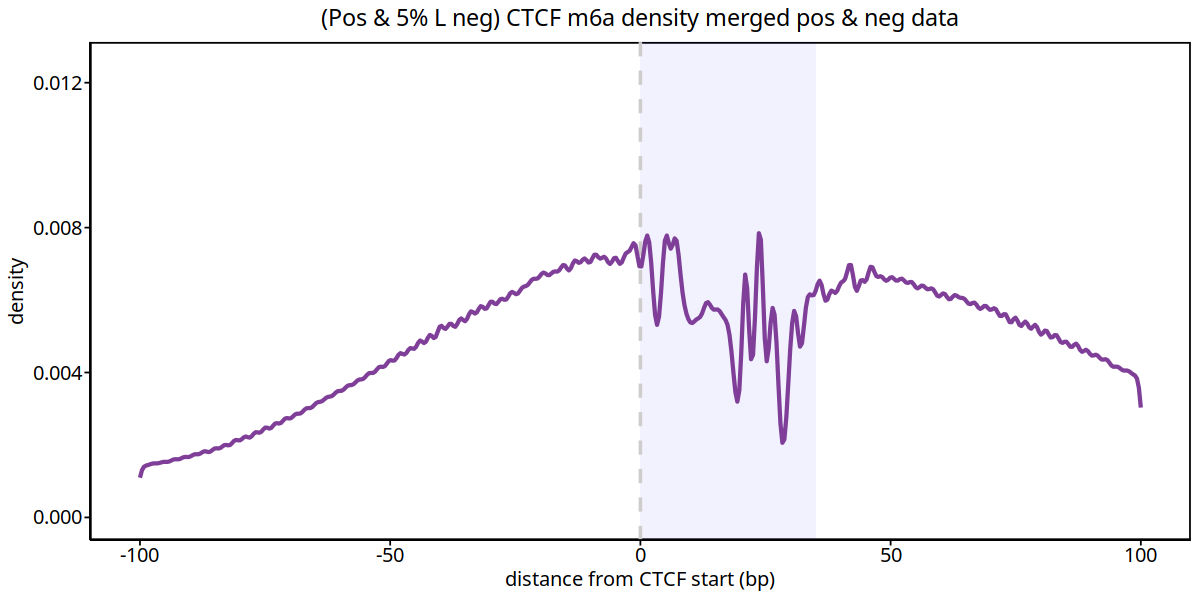

In [38]:
# create density plot
font_size <- 12
font_info <- element_text(size=font_size, family="ArialMT", color="black")

plot_title <- sprintf("(%s) CTCF m6a density merged pos & neg data", 
                      "Pos & 5% L neg")
x_axis_name <- "distance from CTCF start (bp)"
# red, blue (negative, positive)
color_vals <- c("#000000", "#be282d")#"#2a3d8c"

# set plot size
options(repr.plot.width=pdf_dims[1], repr.plot.height=pdf_dims[2])


p <- ggplot(df, aes(x=centered_start)) +
    # add box over motif location
    annotate("rect", xmin=0, xmax=35, ymin=-Inf, ymax=+Inf, alpha=0.05, fill=motif_annot_col) +
    # add vertical line at x=0
    geom_vline(xintercept=0, color=vline_col, show.legend=FALSE, linetype="dashed", linewidth=1) +
    # density plot
    geom_density(col=m6a_col, size=1.2, adjust=0.5) +
    ylim(NA, 0.0125) +
    # red, blue
    #scale_color_manual(name="Population", values=color_vals, labels=c("Negative", "Positive")) +
    
    ggtitle(plot_title) +
    scale_x_continuous(name=x_axis_name) +
    theme_classic() +
    theme(text = font_info,
          axis.ticks = element_line(color="#000000", lineend="square"),
          axis.text = font_info,
          panel.background = element_rect(fill="transparent", color="#000000", size=1),
          plot.title = element_text(family="ArialMT", size=font_size+2, hjust=0.5))
p

if (save_pdf == TRUE) {
    ggsave(output_file, plot = p, width=pdf_dims[1], height=pdf_dims[2])
}

__postitive vs negative__

In [45]:
#------------ Set output file ------------
output_file_name <- sprintf("CTCF_%s.mokapot.m6a_fiberseq_density-pos_v_neg.pdf", file_root)
output_file <- sprintf("%s/%s", output_folder, output_file_name)
print(output_file)

# save file
save_pdf <- TRUE
pdf_dims <- c(10,5)
     

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/mokapot_res/figures/CTCF_100bp_small_5_L.mokapot.m6a_fiberseq_density-pos_v_neg.pdf"


In [46]:
head(df, 1)

motif_query,motif_name,chrom,centering_position,strand,subset_sequence,reference_start,reference_end,query_name,centered_query_start,⋯,centered_position_type,centered_start,centered_end,msp_size,Label,FDR,FDR_05,FDR_01,FDR_001,FDR_0001
<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<int>,⋯,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
chr1_778834_-/m54329U_210323_190418/57542526/ccs,chr1_778834_-,chr1,778834,-,CCGGCGCCGAAGACCGGGAAGTCGTAAAGCTCCTCCTCGTGGCTTATGTGCGGCGGCGGCCGGGCAGAAGCCTAGCGACACAGAACTGCCAGCTCAGCAGCCGGTTACATCCCGCCCGGCCACCAGTAGGCAGCGTCCGCTCATGCGCGCTCCTGGAAGAAACAGCAGCCCCCACCGCGAGTTCTGATTGGCTCTGCGTGA,755085,783504,m54329U_210323_190418/57542526/ccs,-23863,⋯,m6a,-91,-90,500,Positive,0.0239523,low_FDR,high_FDR,high_FDR,high_FDR


In [41]:
table(df$Label)


Negative Positive 
 8040195 32281919 

In [47]:
# define colors (grey, purple, gray, blue)
vline_col <- "#CECDCC"
m6a_col <- "#7F3F98"
fiber_col <- "#D1D2D4"
motif_annot_col <- "blue"
# colors from Mitchell's presentation
# orange, red, purple, light grey, navy (gene track)
mitch_cols <- c("#FF8C00", "#FF0000", "#9370DB", "#E6E6E6", "#0C0C78")

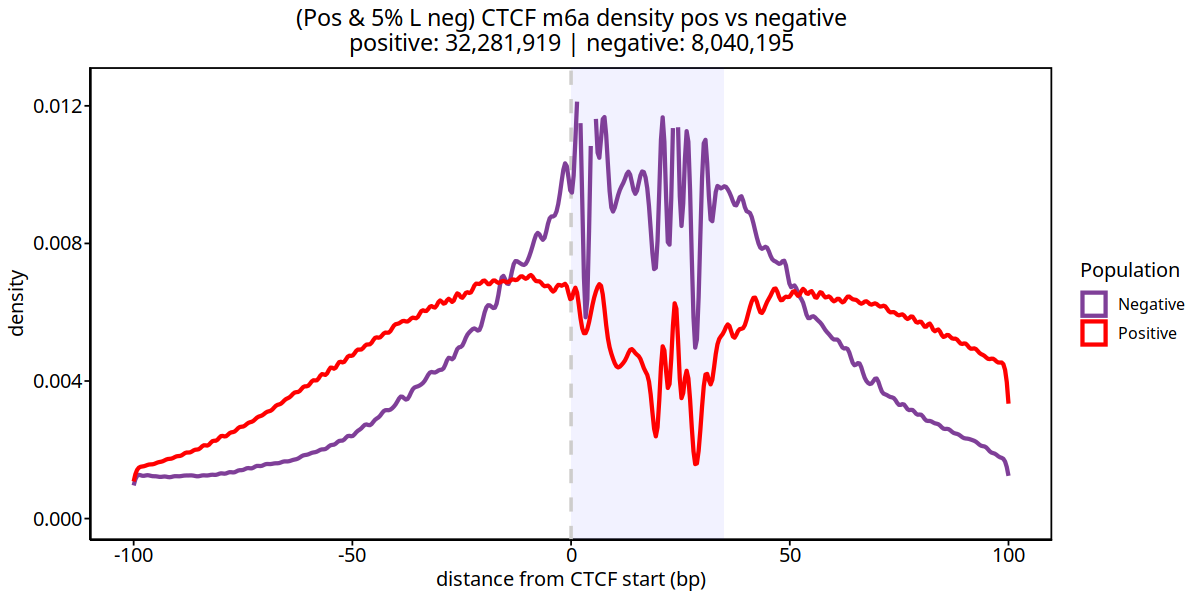

In [48]:
# create density plot
font_size <- 12
font_info <- element_text(size=font_size, family="ArialMT", color="black")

plot_title <- sprintf("(%s) CTCF m6a density pos vs negative\npositive: %s | negative: %s", 
                      "Pos & 5% L neg", 
                      format(table(df$Label)["Positive"], big.mark=",", scientific=FALSE), 
                      format(table(df$Label)["Negative"], big.mark=",", scientific=FALSE))
x_axis_name <- "distance from CTCF start (bp)"
# black, red (negative, positive)
#color_vals <- c("#000000", "#be282d")#"#2a3d8c"
# neg: purple (lots of m6a) | pos: red (no m6a)
color_vals <- c(m6a_col, mitch_cols[2])

# set plot size
options(repr.plot.width=pdf_dims[1], repr.plot.height=pdf_dims[2])


p <- ggplot(df, aes(x=centered_start, group=Label)) +
    # add box over motif location
    annotate("rect", xmin=0, xmax=35, ymin=-Inf, ymax=+Inf, alpha=0.05, fill="blue") +
    # add vertical line at x=0
    geom_vline(xintercept=0, color="#CECDCC", show.legend=FALSE, linetype="dashed", linewidth=1) +
    # density plot
    geom_density(aes(col=Label), size=1.2, adjust=0.5) +
    # red, blue
    scale_color_manual(name="Population", values=color_vals, labels=c("Negative", "Positive")) +
    ylim(NA, 0.0125) +
    
    ggtitle(plot_title) +
    scale_x_continuous(name=x_axis_name) +
    theme_classic() +
    theme(text = font_info,
          axis.ticks = element_line(color="#000000", lineend="square"),
          axis.text = font_info,
          panel.background = element_rect(fill="transparent", color="#000000", size=1),
          plot.title = element_text(family="ArialMT", size=font_size+2, hjust=0.5))
p

if (save_pdf == TRUE) {
    ggsave(output_file, plot = p, width=pdf_dims[1], height=pdf_dims[2])
}

### Pos data (FDR filt)

In [36]:
#------------ Set output file ------------
output_file_name <- sprintf("CTCF_%s.mokapot.m6a_fiberseq_density-pos_FDR.pdf", file_root)
output_file <- sprintf("%s/%s", output_folder, output_file_name)
print(output_file)

# save file?
save_pdf <- FALSE
pdf_dims <- c(10,5)

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/figures/CTCF_100bp_small_5_L.mokapot.m6a_fiberseq_density-pos_FDR.pdf"


In [37]:
# copy df_p back to df
df <- df_p

In [38]:
head(df, 1)

motif_query,motif_name,chrom,centering_position,strand,subset_sequence,reference_start,reference_end,query_name,centered_query_start,⋯,centered_position_type,centered_start,centered_end,msp_size,Label,FDR,FDR_05,FDR_01,FDR_001,FDR_0001
<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<int>,⋯,<chr>,<int>,<int>,<int>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>
chr1_778834_-/m54329U_210323_190418/57542526/ccs,chr1_778834_-,chr1,778834,-,CCGGCGCCGAAGACCGGGAAGTCGTAAAGCTCCTCCTCGTGGCTTATGTGCGGCGGCGGCCGGGCAGAAGCCTAGCGACACAGAACTGCCAGCTCAGCAGCCGGTTACATCCCGCCCGGCCACCAGTAGGCAGCGTCCGCTCATGCGCGCTCCTGGAAGAAACAGCAGCCCCCACCGCGAGTTCTGATTGGCTCTGCGTGA,755085,783504,m54329U_210323_190418/57542526/ccs,-23863,⋯,m6a,-91,-90,500,Positive,0.0239523,low_FDR,high_FDR,high_FDR,high_FDR


In [39]:
# filter for positive data
pos <- df[df$Label == "Positive"]

In [40]:
# change df to wide format
pos <- pos[,c("centered_start", "FDR_05", "FDR_01", "FDR_001", "FDR_0001")]

In [42]:
FDR_cols <- c("FDR_05", "FDR_01", "FDR_001", "FDR_0001")

In [44]:
table(pos$FDR_05)


high_FDR  low_FDR 
 1383116 30898803 

__FDR < 0.05__

In [50]:
#------------ Set output file ------------
FDR <- 0.05
output_file_name <- sprintf("CTCF_%s.mokapot.m6a_fiberseq_density-pos_FDR_%s.pdf", file_root, FDR)
output_file <- sprintf("%s/%s", output_folder, output_file_name)
print(output_file)

# save file?
save_pdf <- TRUE
pdf_dims <- c(10,5)

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/figures/CTCF_100bp_small_5_L.mokapot.m6a_fiberseq_density-pos_FDR_0.05.pdf"


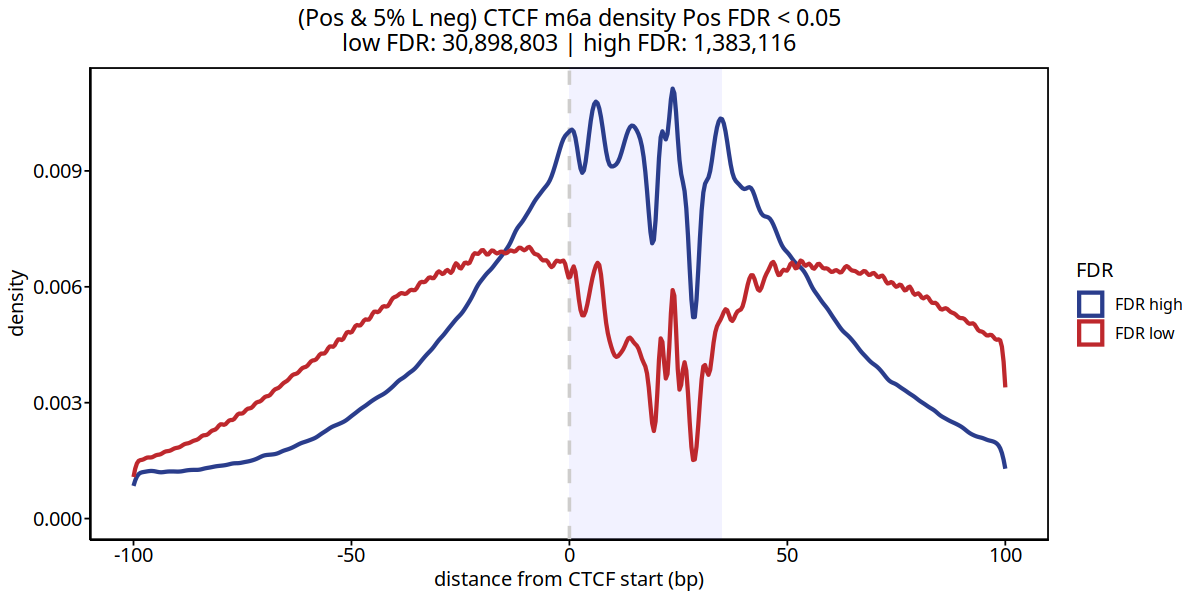

In [51]:
# create density plot
FDR <- 0.05
font_size <- 12
font_info <- element_text(size=font_size, family="ArialMT", color="black")

plot_title <- sprintf("(%s) CTCF m6a density Pos FDR < %s\nlow FDR: %s | high FDR: %s", 
                      "Pos & 5% L neg", FDR,
                      format(table(pos$FDR_05)["low_FDR"], big.mark=",", scientific=FALSE), 
                      format(table(pos$FDR_05)["high_FDR"], big.mark=",", scientific=FALSE))
x_axis_name <- "distance from CTCF start (bp)"
# red, blue (low, high)
color_vals <- c("#2a3d8c", "#be282d")#"#2a3d8c"

# set plot size
options(repr.plot.width=pdf_dims[1], repr.plot.height=pdf_dims[2])


p <- ggplot(pos, aes(x=centered_start, group=FDR_05)) +
    # add box over motif location
    annotate("rect", xmin=0, xmax=35, ymin=-Inf, ymax=+Inf, alpha=0.05, fill="blue") +
    # add vertical line at x=0
    geom_vline(xintercept=0, color="#CECDCC", show.legend=FALSE, linetype="dashed", linewidth=1) +
    # density plot
    geom_density(aes(col=FDR_05), size=1.2, adjust=0.5) +
    # red, blue
    scale_color_manual(name="FDR", values=color_vals, labels=c("FDR high", "FDR low")) +
    
    ggtitle(plot_title) +
    scale_x_continuous(name=x_axis_name) +
    theme_classic() +
    theme(text = font_info,
          axis.ticks = element_line(color="#000000", lineend="square"),
          axis.text = font_info,
          panel.background = element_rect(fill="transparent", color="#000000", size=1),
          plot.title = element_text(family="ArialMT", size=font_size+2, hjust=0.5))
p

if (save_pdf == TRUE) {
    ggsave(output_file, plot = p, width=pdf_dims[1], height=pdf_dims[2])
}

__FDR < 0.01__

In [59]:
#------------ Set output file ------------
FDR <- 0.01
output_file_name <- sprintf("CTCF_%s.mokapot.m6a_fiberseq_density-pos_FDR_%s.pdf", file_root, FDR)
output_file <- sprintf("%s/%s", output_folder, output_file_name)
print(output_file)

# save file?
save_pdf <- TRUE
pdf_dims <- c(10,5)

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/mokapot_res/figures/CTCF_100bp_small_5_L.mokapot.m6a_fiberseq_density-pos_FDR_0.01.pdf"


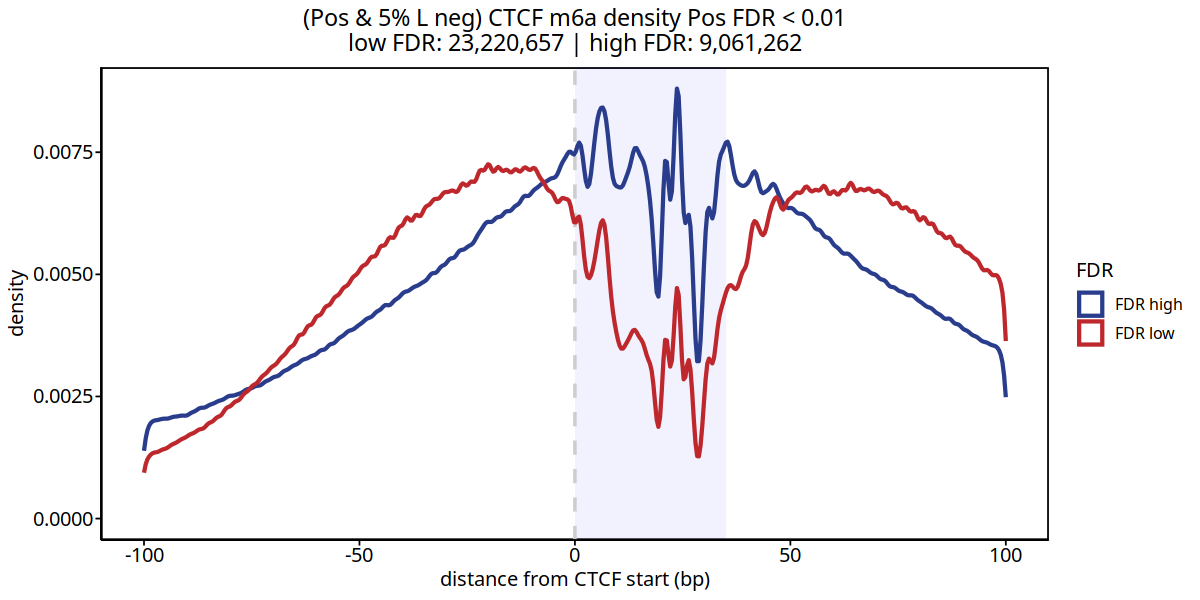

In [60]:
# create density plot
FDR <- 0.01
font_size <- 12
font_info <- element_text(size=font_size, family="ArialMT", color="black")

plot_title <- sprintf("(%s) CTCF m6a density Pos FDR < %s\nlow FDR: %s | high FDR: %s", 
                      "Pos & 5% L neg", FDR,
                      format(table(pos$FDR_01)["low_FDR"], big.mark=",", scientific=FALSE), 
                      format(table(pos$FDR_01)["high_FDR"], big.mark=",", scientific=FALSE))
x_axis_name <- "distance from CTCF start (bp)"
# red, blue (low, high)
color_vals <- c("#2a3d8c", "#be282d")#"#2a3d8c"

# set plot size
options(repr.plot.width=pdf_dims[1], repr.plot.height=pdf_dims[2])


p <- ggplot(pos, aes(x=centered_start, group=FDR_01)) +
    # add box over motif location
    annotate("rect", xmin=0, xmax=35, ymin=-Inf, ymax=+Inf, alpha=0.05, fill="blue") +
    # add vertical line at x=0
    geom_vline(xintercept=0, color="#CECDCC", show.legend=FALSE, linetype="dashed", linewidth=1) +
    # density plot
    geom_density(aes(col=FDR_01), size=1.2, adjust=0.5) +
    # red, blue
    scale_color_manual(name="FDR", values=color_vals, labels=c("FDR high", "FDR low")) +
    
    ggtitle(plot_title) +
    scale_x_continuous(name=x_axis_name) +
    theme_classic() +
    theme(text = font_info,
          axis.ticks = element_line(color="#000000", lineend="square"),
          axis.text = font_info,
          panel.background = element_rect(fill="transparent", color="#000000", size=1),
          plot.title = element_text(family="ArialMT", size=font_size+2, hjust=0.5))
p

if (save_pdf == TRUE) {
    ggsave(output_file, plot = p, width=pdf_dims[1], height=pdf_dims[2])
}

__FDR < 0.01__

In [61]:
#------------ Set output file ------------
FDR <- 0.001
output_file_name <- sprintf("CTCF_%s.mokapot.m6a_fiberseq_density-pos_FDR_%s.pdf", file_root, FDR)
output_file <- sprintf("%s/%s", output_folder, output_file_name)
print(output_file)

# save file?
save_pdf <- TRUE
pdf_dims <- c(10,5)

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/mokapot_res/figures/CTCF_100bp_small_5_L.mokapot.m6a_fiberseq_density-pos_FDR_0.001.pdf"


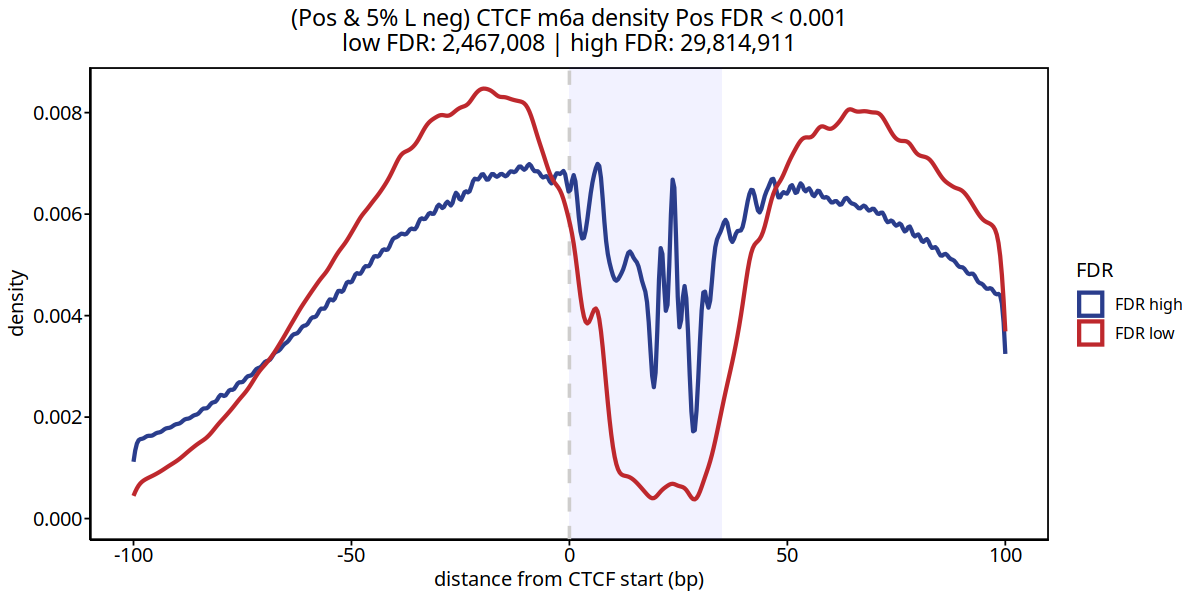

In [62]:
# create density plot
FDR <- 0.001
font_size <- 12
font_info <- element_text(size=font_size, family="ArialMT", color="black")

plot_title <- sprintf("(%s) CTCF m6a density Pos FDR < %s\nlow FDR: %s | high FDR: %s", 
                      "Pos & 5% L neg", FDR,
                      format(table(pos$FDR_001)["low_FDR"], big.mark=",", scientific=FALSE), 
                      format(table(pos$FDR_001)["high_FDR"], big.mark=",", scientific=FALSE))
x_axis_name <- "distance from CTCF start (bp)"
# red, blue (low, high)
color_vals <- c("#2a3d8c", "#be282d")#"#2a3d8c"

# set plot size
options(repr.plot.width=pdf_dims[1], repr.plot.height=pdf_dims[2])


p <- ggplot(pos, aes(x=centered_start, group=FDR_001)) +
    # add box over motif location
    annotate("rect", xmin=0, xmax=35, ymin=-Inf, ymax=+Inf, alpha=0.05, fill="blue") +
    # add vertical line at x=0
    geom_vline(xintercept=0, color="#CECDCC", show.legend=FALSE, linetype="dashed", linewidth=1) +
    # density plot
    geom_density(aes(col=FDR_001), size=1.2, adjust=0.5) +
    # red, blue
    scale_color_manual(name="FDR", values=color_vals, labels=c("FDR high", "FDR low")) +
    
    ggtitle(plot_title) +
    scale_x_continuous(name=x_axis_name) +
    theme_classic() +
    theme(text = font_info,
          axis.ticks = element_line(color="#000000", lineend="square"),
          axis.text = font_info,
          panel.background = element_rect(fill="transparent", color="#000000", size=1),
          plot.title = element_text(family="ArialMT", size=font_size+2, hjust=0.5))
p

if (save_pdf == TRUE) {
    ggsave(output_file, plot = p, width=pdf_dims[1], height=pdf_dims[2])
}

__FDR < 0.0001__

In [55]:
#------------ Set output file ------------
FDR <- 0.0001
output_file_name <- sprintf("CTCF_%s.mokapot.m6a_fiberseq_density-pos_FDR_%s.pdf", file_root, FDR)
output_file <- sprintf("%s/%s", output_folder, output_file_name)
print(output_file)

# save file?
save_pdf <- TRUE
pdf_dims <- c(10,5)

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/figures/CTCF_100bp_small_5_L.mokapot.m6a_fiberseq_density-pos_FDR_1e-04.pdf"


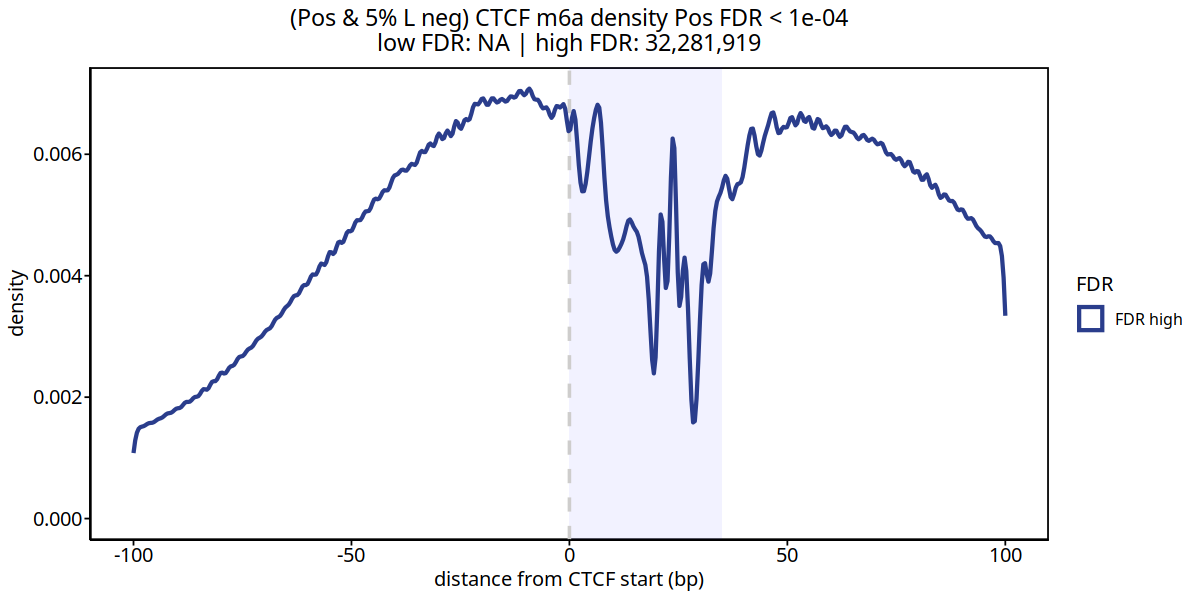

In [56]:
# create density plot
FDR <- 0.0001
font_size <- 12
font_info <- element_text(size=font_size, family="ArialMT", color="black")

plot_title <- sprintf("(%s) CTCF m6a density Pos FDR < %s\nlow FDR: %s | high FDR: %s", 
                      "Pos & 5% L neg", FDR,
                      format(table(pos$FDR_0001)["low_FDR"], big.mark=",", scientific=FALSE), 
                      format(table(pos$FDR_0001)["high_FDR"], big.mark=",", scientific=FALSE))
x_axis_name <- "distance from CTCF start (bp)"
# red, blue (low, high)
color_vals <- c("#2a3d8c", "#be282d")#"#2a3d8c"

# set plot size
options(repr.plot.width=pdf_dims[1], repr.plot.height=pdf_dims[2])


p <- ggplot(pos, aes(x=centered_start, group=FDR_0001)) +
    # add box over motif location
    annotate("rect", xmin=0, xmax=35, ymin=-Inf, ymax=+Inf, alpha=0.05, fill="blue") +
    # add vertical line at x=0
    geom_vline(xintercept=0, color="#CECDCC", show.legend=FALSE, linetype="dashed", linewidth=1) +
    # density plot
    geom_density(aes(col=FDR_0001), size=1.2, adjust=0.5) +
    # red, blue
    scale_color_manual(name="FDR", values=color_vals, labels=c("FDR high", "FDR low")) +
    
    ggtitle(plot_title) +
    scale_x_continuous(name=x_axis_name) +
    theme_classic() +
    theme(text = font_info,
          axis.ticks = element_line(color="#000000", lineend="square"),
          axis.text = font_info,
          panel.background = element_rect(fill="transparent", color="#000000", size=1),
          plot.title = element_text(family="ArialMT", size=font_size+2, hjust=0.5))
p

if (save_pdf == TRUE) {
    ggsave(output_file, plot = p, width=pdf_dims[1], height=pdf_dims[2])
}

## per fiber m6a plots

In [69]:
res <- df_p

In [78]:
# save res to moka
moka <- res

In [65]:
#------------ Example motif data ------------

# load data file
data_file_name <- "CTCF_m6a_fiberseq_100bp_fig_example_positive.txt"
data_file <- sprintf("%s/%s", data_folder, data_file_name)
print(data_file)

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/candidate_footprints/CTCF_m6a_fiberseq_100bp_fig_example_positive.txt"


In [66]:
# read table
df <- fread(data_file)
dim(df)

[1] 2165   13

In [72]:
# add motif_name row
df$motif_name <- paste(df$chrom, df$centering_position, df$strand, sep="_")
# move motif_name to first column
df <- df %>%
    select("motif_name", everything())

# add motif_query column
df <- cbind(paste(df$motif_name, df$query_name, sep="/"), df)
# rename column
colnames(df)[1] = "motif_query"

In [74]:
# get only m6a & msp rows
df <- df[df$centered_position_type %in% c("m6a", "msp")]
dim(df)

[1] 2054   15

In [75]:
# get only instances with motifs within an msp
df <- df %>%
        group_by(chrom, centering_position, strand, query_name) %>%
        filter(any(centered_position_type == "msp" & centered_start <= 0 & centered_end >= 35))
dim(df)

[1] 1878   15

In [76]:
# get only m6a instances
df <- filter(df, centered_position_type == "m6a")

In [80]:
moka <- filter(moka, motif_query %in% df$motif_query)
dim(moka)

[1] 1829   22

In [81]:
# plot m6a instances in coords
motif_coords <- c("chr20", 63786415, 63786450)

#### all purple

In [100]:
#------------ Set output file ------------
output_file_name <- sprintf("CTCF_%s.mokapot.m6a_per_fiber_uncolored.pdf", file_root)
output_file <- sprintf("%s/%s", output_folder, output_file_name)
print(output_file)

# save file
save_pdf <- TRUE
pdf_dims <- c(10,5)

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/mokapot_res/figures/CTCF_100bp_small_5_L.mokapot.m6a_per_fiber_uncolored.pdf"


In [104]:
# make plotting data
df_p <- moka[, c("motif_query", "motif_name", "query_name", "centered_start", "centered_end", "FDR")]

In [105]:
# create vector of 0s for m6a positions
df_m6a <- data.frame(matrix(0, ncol = 49, nrow = 201))
colnames(df_m6a) <- unique(df_p$query_name)
rownames(df_m6a) <- 1:nrow(df_m6a)

for (name in unique(df_p$query_name)) {
    # add 101 to positions to make them positive & match index
    m6a_positions <- df_p[df_p$query_name == name]$centered_start + 101
    x <- numeric(201)
    x[m6a_positions] <- 1
    df_m6a[name] <- x
}

In [106]:
# sort rows by similarity
unsorted_df <- t(df_m6a)
N <- nrow(unsorted_df)
same1 <- function(x, y) sum((x+y) == 2, na.rm=TRUE)
df_list <- unlist(apply(unsorted_df, 1, list),F,F)
df_combos <- which(upper.tri(matrix(NA, nrow=N, ncol=N)),arr.ind=T) #expand.grid(1:length(df_list),1:length(df_list))
commonality <- mapply(same1, df_list[df_combos[,1]], df_list[df_combos[,2]])
best_match <- c()
for(i in 1:length(df_list)){
    best_match[i] <- max(commonality[apply(df_combos,1,function(x)i%in%x)])
}

sorted_df <- unsorted_df[order(best_match, decreasing=TRUE),]
sorted_fibers <- rownames(sorted_df)

# sort by similarity
#df_p <- df_p %>% arrange(factor(query_name, levels=sorted_fibers))
df_p$query_name <- factor(df_p$query_name, levels=sorted_fibers)
df_p <- df_p[order(df_p$query_name)]

In [107]:
# add col with y-axis coords
y_min <- seq(from=0, by=1, length.out=length(unique(df_p$query_name)))
y_max <- seq(from=0.75, by=1, length.out=length(unique(df_p$query_name)))

y_min_vals <- setNames(y_min, unique(df_p$query_name))
y_max_vals <- setNames(y_max, unique(moka$query_name))

df_p <- df_p %>%
            mutate(
                y_min = y_min_vals[query_name],
                y_max = y_max_vals[query_name]
            )
dim(df_p)

[1] 1829    8

In [108]:
# get plot limits
x_min <- max(df_p$centered_start)
x_max <- min(df_p$centered_end)
# number of fibers
n_fibers <- length(unique(df_p$query_name))
n_fibers

[1] 49

In [109]:
# coords for fiber info
df_fiber <- df_p %>% 
                group_by(y_min, y_max) %>%
                summarise(
                    x_min = -100,
                    x_max = 101,
                )

`summarise()` has grouped output by 'y_min'. You can override using the
`.groups` argument.


In [110]:
# set plot parameters
plot_title <- sprintf("(%s) m6a instances per fiber (%s) over %s: %s-%s",
                      "Pos & 5% L neg", length(unique(df_p$query_name)), motif_coords[1], motif_coords[2], motif_coords[3])
x_axis_name <- "area surrounding motif (bp)"
y_axis_name <- sprintf("%s fibers", length(unique(df_p$query_name)))
font_size <- 10
font_info <- element_text(size=font_size, family="ArialMT", color="black")

# grey
vline_col <- "#CECDCC"
# purple
m6a_col <- "#7F3F98"
# gray
fiber_col <- "#D1D2D4"

# colors from Mitchell's presentation
# orange, red, purple, light grey, navy (gene track)
mitch_cols <- c("#FF8C00", "#FF0000", "#9370DB", "#E6E6E6", "#0C0C78")


In [111]:
# change plot dimensions
options(repr.plot.width=20, repr.plot.height=10)

set_plot_dimensions <- function(width_choice, height_choice) {
        options(repr.plot.width=width_choice, repr.plot.height=height_choice)
        }

set_plot_dimensions(10, 5)

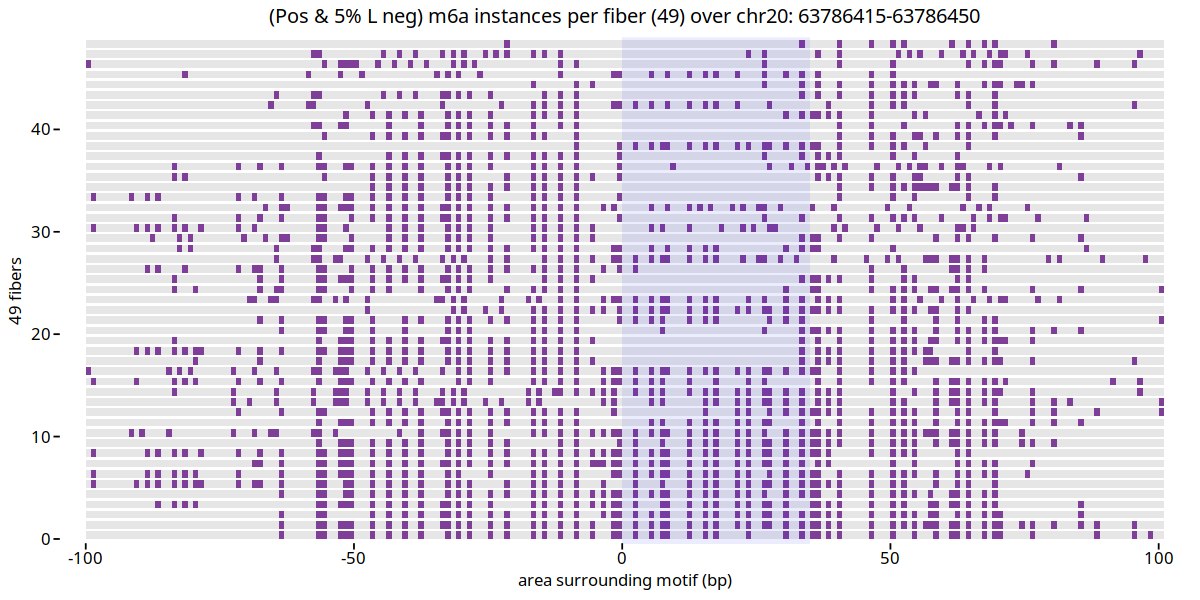

In [113]:
# plot! (sorted)
# set plot size
options(repr.plot.width=pdf_dims[1], repr.plot.height=pdf_dims[2])

p <- ggplot(df_p) +
        geom_rect(aes(xmin=x_min, xmax=x_max, ymin=y_min, ymax=y_max), fill=mitch_cols[4], data=df_fiber) +
        geom_rect(aes(xmin=centered_start, xmax=centered_end, ymin=y_min, ymax=y_max), fill=m6a_col, data=df_p) +
        # add box over motif location
        annotate("rect", xmin=0, xmax=35, ymin=-Inf, ymax=+Inf, alpha=0.075, fill="blue") +
        #coord_cartesian(ylim=c(0, 50)) +
        scale_y_continuous(limits=c(0, 49), expand=expansion(add=c(0.5,0)), name=y_axis_name) +
        ggtitle(plot_title) +
        scale_x_continuous(name=x_axis_name, expand=expansion(add=c(5, 5))) +
        theme_classic() +
            theme(text = font_info,
            axis.ticks = element_line(color="#000000", lineend="square"),
            axis.text = font_info,
            axis.line = element_blank(),
            panel.background = element_blank(),
            plot.title = element_text(family="ArialMT", size=12, hjust=0.5),
            legend.position = "none")

p

if (save_pdf == TRUE) {
    ggsave(output_file, plot = p, width=pdf_dims[1], height=pdf_dims[2])
}

##### purple & sorted

In [189]:
#------------ Set output file ------------
output_file_name <- sprintf("CTCF_%s.mokapot.m6a_per_fiber_uncolored_FDR_sorted.pdf", file_root)
output_file <- sprintf("%s/%s", output_folder, output_file_name)
print(output_file)

# save file?
save_pdf <- TRUE
pdf_dims <- c(10,5)

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/mokapot_res/figures/CTCF_100bp_small_5_L.mokapot.m6a_per_fiber_uncolored_FDR_sorted.pdf"


In [192]:
# set plot parameters
plot_title <- sprintf("(%s) m6a instances per fiber (%s) over %s: %s-%s",
                      "Pos & 5% L neg", length(unique(df_p$query_name)), motif_coords[1], motif_coords[2], motif_coords[3])
x_axis_name <- "area surrounding motif (bp)"
y_axis_name <- sprintf("%s fibers", length(unique(df_p$query_name)))
font_size <- 10
font_info <- element_text(size=font_size, family="ArialMT", color="black")

# grey
vline_col <- "#CECDCC"
# purple
m6a_col <- "#7F3F98"
# gray
fiber_col <- "#D1D2D4"

# colors from Mitchell's presentation
# orange, red, purple, light grey, navy (gene track)
mitch_cols <- c("#FF8C00", "#FF0000", "#9370DB", "#E6E6E6", "#0C0C78")

In [190]:
# add color based on FDR value
# purple, red
fill_cols <- c(m6a_col, m6a_col)

df_p$fill_col <- ifelse(df_p$FDR <= FDR, fill_cols[1], fill_cols[2])
df_p$FDR_group <- ifelse(df_p$FDR <= FDR, "low_FDR", "high_FDR")

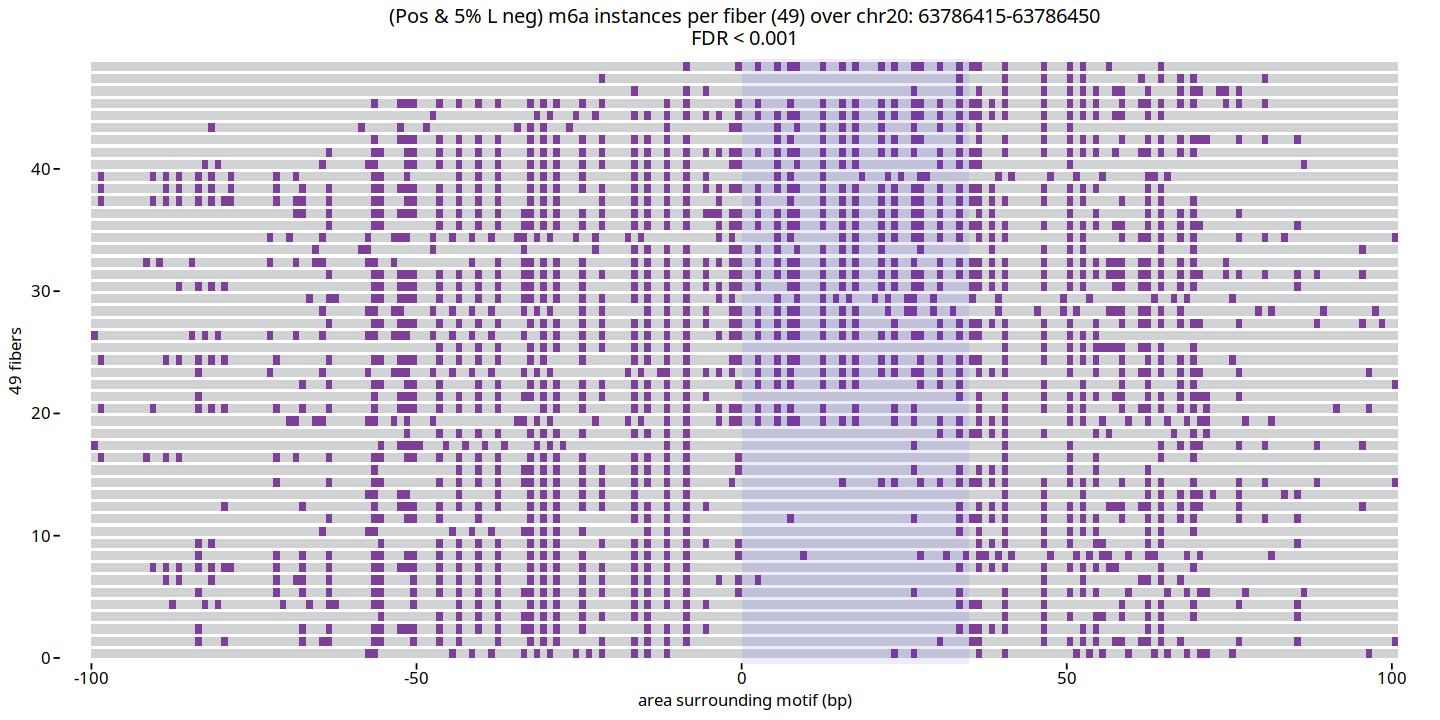

In [191]:
# plot (colored by FDR)

p <- ggplot(df_p) +
        geom_rect(aes(xmin=x_min, xmax=x_max, ymin=y_min, ymax=y_max), fill=fiber_col, data=df_fiber) +
        geom_rect(aes(xmin=centered_start, xmax=centered_end, ymin=y_min, ymax=y_max, group=FDR_group), fill=df_p$fill_col, data=df_p) +
        scale_color_identity() +
        # add box over motif location
        annotate("rect", xmin=0, xmax=35, ymin=-Inf, ymax=+Inf, alpha=0.075, fill="blue") +
        scale_y_continuous(limits=c(0, 49), expand=expansion(add=c(0.5,0)), name=y_axis_name) +
        ggtitle(plot_title) +
        scale_x_continuous(name=x_axis_name, expand=expansion(add=c(5, 5))) +
        theme_classic() +
            theme(text = font_info,
            axis.ticks = element_line(color="#000000", lineend="square"),
            axis.text = font_info,
            axis.line = element_blank(),
            panel.background = element_blank(),
            plot.title = element_text(family="ArialMT", size=12, hjust=0.5),
            legend.position = "none")
p

if (save_pdf == TRUE) {
    ggsave(output_file, plot = p, width=pdf_dims[1], height=pdf_dims[2])
}

### colored by FDR

#### FDR < 0.05

In [114]:
#------------ Set output file ------------
FDR <- 0.05
output_file_name <- sprintf("CTCF_%s.mokapot.m6a_per_fiber_FDR_%s.pdf", file_root, FDR)
output_file <- sprintf("%s/%s", output_folder, output_file_name)
print(output_file)

# save file
save_pdf <- TRUE
pdf_dims <- c(10,5)

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/mokapot_res/figures/CTCF_100bp_small_5_L.mokapot.m6a_per_fiber_FDR_0.05.pdf"


In [164]:
# make plotting data
df_p <- moka[, c("motif_query", "motif_name", "query_name", "centered_start", "centered_end", "FDR")]
     

In [165]:
# sort by FDR value
df_p <- df_p[order(df_p$FDR)]

In [166]:
# add col with y-axis coords
y_min <- seq(from=0, by=1, length.out=length(unique(df_p$query_name)))
y_max <- seq(from=0.75, by=1, length.out=length(unique(df_p$query_name)))

y_min_vals <- setNames(y_min, unique(df_p$query_name))
y_max_vals <- setNames(y_max, unique(df_p$query_name))

df_p <- df_p %>%
            mutate(
                y_min = y_min_vals[query_name],
                y_max = y_max_vals[query_name]
            )
dim(df_p)

[1] 1829    8

In [167]:
# get plot limits
x_min <- max(df_p$centered_start)
x_max <- min(df_p$centered_end)
# number of fibers
n_fibers <- length(unique(df_p$query_name))
n_fibers

[1] 49

In [168]:
# coords for fiber info
df_fiber <- df_p %>% 
                group_by(y_min, y_max) %>%
                summarise(
                    x_min = -100,
                    x_max = 101,     
                )

`summarise()` has grouped output by 'y_min'. You can override using the
`.groups` argument.


In [169]:
# set plot parameters
plot_title <- sprintf("(%s) m6a instances per fiber (%s) over %s: %s-%s\nFDR < %s",
                      "Pos & 5% L neg", length(unique(df_p$query_name)), motif_coords[1], motif_coords[2], motif_coords[3], FDR)
x_axis_name <- "area surrounding motif (bp)"
y_axis_name <- sprintf("%s fibers", length(unique(df_p$query_name)))
font_size <- 10
font_info <- element_text(size=font_size, family="ArialMT", color="black")

# grey
vline_col <- "#CECDCC"
# purple
m6a_col <- "#7F3F98"
# gray
fiber_col <- "#D1D2D4"

# colors from Mitchell's presentation
# orange, red, purple, light grey, navy (gene track)
mitch_cols <- c("#FF8C00", "#FF0000", "#9370DB", "#E6E6E6", "#0C0C78")

In [170]:
# add color based on FDR value
# purple, red
fill_cols <- c(m6a_col, mitch_cols[2])

df_p$fill_col <- ifelse(df_p$FDR <= FDR, fill_cols[1], fill_cols[2])
df_p$FDR_group <- ifelse(df_p$FDR <= FDR, "low_FDR", "high_FDR")

In [171]:
# change plot dimensions
options(repr.plot.width=20, repr.plot.height=10)

set_plot_dimensions <- function(width_choice, height_choice) {
        options(repr.plot.width=width_choice, repr.plot.height=height_choice)
        }

set_plot_dimensions(12, 6)

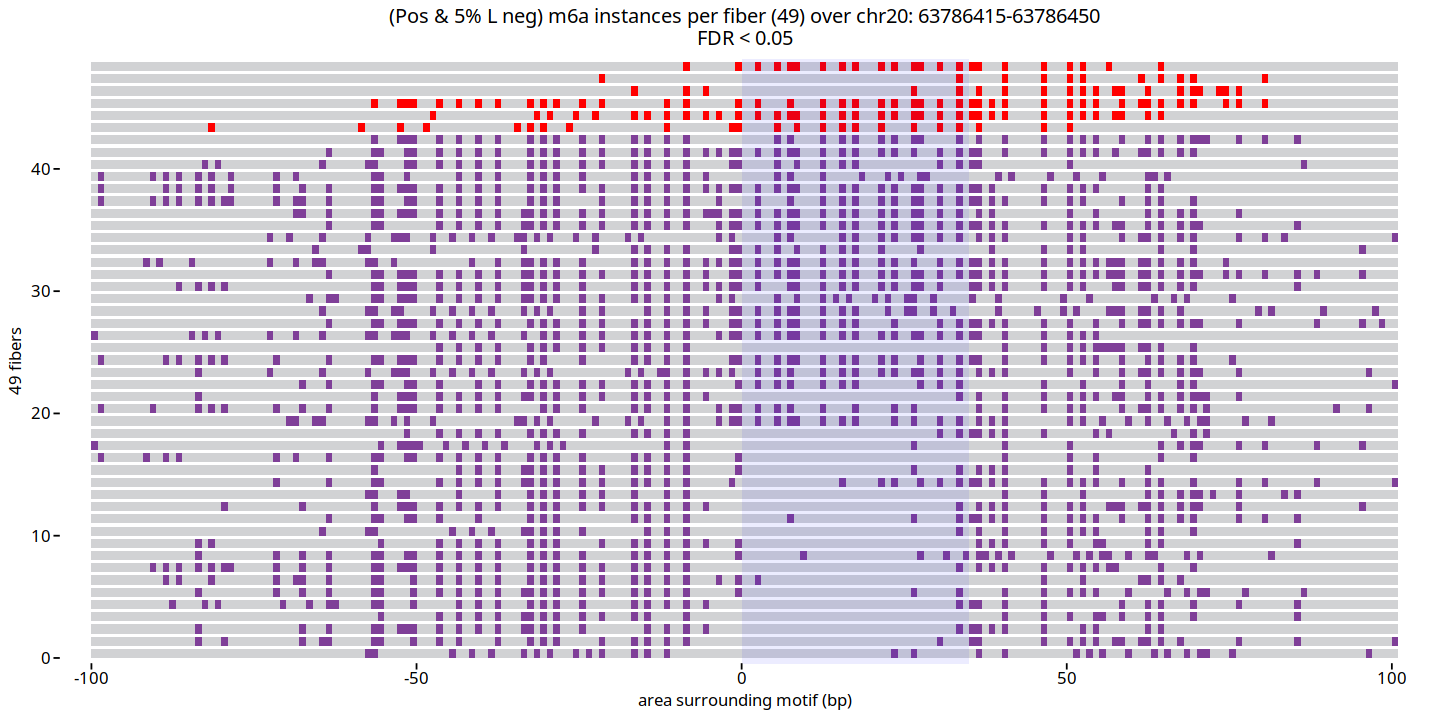

In [172]:
# plot (colored by FDR)

p <- ggplot(df_p) +
        geom_rect(aes(xmin=x_min, xmax=x_max, ymin=y_min, ymax=y_max), fill=fiber_col, data=df_fiber) +
        geom_rect(aes(xmin=centered_start, xmax=centered_end, ymin=y_min, ymax=y_max, group=FDR_group), fill=df_p$fill_col, data=df_p) +
        scale_color_identity() +
        # add box over motif location
        annotate("rect", xmin=0, xmax=35, ymin=-Inf, ymax=+Inf, alpha=0.075, fill="blue") +
        scale_y_continuous(limits=c(0, 49), expand=expansion(add=c(0.5,0)), name=y_axis_name) +
        ggtitle(plot_title) +
        scale_x_continuous(name=x_axis_name, expand=expansion(add=c(5, 5))) +
        theme_classic() +
            theme(text = font_info,
            axis.ticks = element_line(color="#000000", lineend="square"),
            axis.text = font_info,
            axis.line = element_blank(),
            panel.background = element_blank(),
            plot.title = element_text(family="ArialMT", size=12, hjust=0.5),
            legend.position = "none")
p

if (save_pdf == TRUE) {
    ggsave(output_file, plot = p, width=pdf_dims[1], height=pdf_dims[2])
}

#### FDR < 0.01

In [212]:
#------------ Set output file ------------
FDR <- 0.01
output_file_name <- sprintf("CTCF_%s.mokapot.m6a_per_fiber_FDR_%s.pdf", file_root, FDR)
output_file <- sprintf("%s/%s", output_folder, output_file_name)
print(output_file)

# save file
save_pdf <- TRUE
pdf_dims <- c(10,5)

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/mokapot_res/figures/CTCF_100bp_small_5_L.mokapot.m6a_per_fiber_FDR_0.01.pdf"


In [194]:
# make plotting data
df_p <- moka[, c("motif_query", "motif_name", "query_name", "centered_start", "centered_end", "FDR")]
     

In [195]:
# sort by FDR value
df_p <- df_p[order(df_p$FDR)]

# add col with y-axis coords
y_min <- seq(from=0, by=1, length.out=length(unique(df_p$query_name)))
y_max <- seq(from=0.75, by=1, length.out=length(unique(df_p$query_name)))

y_min_vals <- setNames(y_min, unique(df_p$query_name))
y_max_vals <- setNames(y_max, unique(df_p$query_name))

df_p <- df_p %>%
            mutate(
                y_min = y_min_vals[query_name],
                y_max = y_max_vals[query_name]
            )
dim(df_p)

[1] 1829    8

In [210]:
# get plot limits
x_min <- max(df_p$centered_start)
x_max <- min(df_p$centered_end)
# number of fibers
n_fibers <- length(unique(df_p$query_name))
n_fibers

# coords for fiber info
df_fiber <- df_p %>% 
                group_by(y_min, y_max) %>%
                summarise(
                    x_min = -100,
                    x_max = 101,     
                )

# make grey fibers narrower than m6a instances
df_fiber$y_min <- df_fiber$y_min + 0.1
df_fiber$y_max <- df_fiber$y_max - 0.1

[1] 49

`summarise()` has grouped output by 'y_min'. You can override using the
`.groups` argument.


In [207]:
# set plot parameters
plot_title <- sprintf("(%s) m6a instances per fiber (%s) over %s: %s-%s\nFDR < %s",
                      "Pos & 5% L neg", length(unique(df_p$query_name)), motif_coords[1], motif_coords[2], motif_coords[3], FDR)
x_axis_name <- "area surrounding motif (bp)"
y_axis_name <- sprintf("%s fibers", length(unique(df_p$query_name)))
font_size <- 10
font_info <- element_text(size=font_size, family="ArialMT", color="black")

# grey
vline_col <- "#CECDCC"
# purple
m6a_col <- "#7F3F98"
# gray
fiber_col <- "#D1D2D4"

# colors from Mitchell's presentation
# orange, red, purple, light grey, navy (gene track)
mitch_cols <- c("#FF8C00", "#FF0000", "#9370DB", "#E6E6E6", "#0C0C78")

In [208]:
# add color based on FDR value
# purple, red
fill_cols <- c(m6a_col, mitch_cols[2])

df_p$fill_col <- ifelse(df_p$FDR <= FDR, fill_cols[1], fill_cols[2])
df_p$FDR_group <- ifelse(df_p$FDR <= FDR, "low_FDR", "high_FDR")

In [202]:
# change plot dimensions
options(repr.plot.width=20, repr.plot.height=10)

set_plot_dimensions <- function(width_choice, height_choice) {
        options(repr.plot.width=width_choice, repr.plot.height=height_choice)
        }

set_plot_dimensions(15, 7.5)

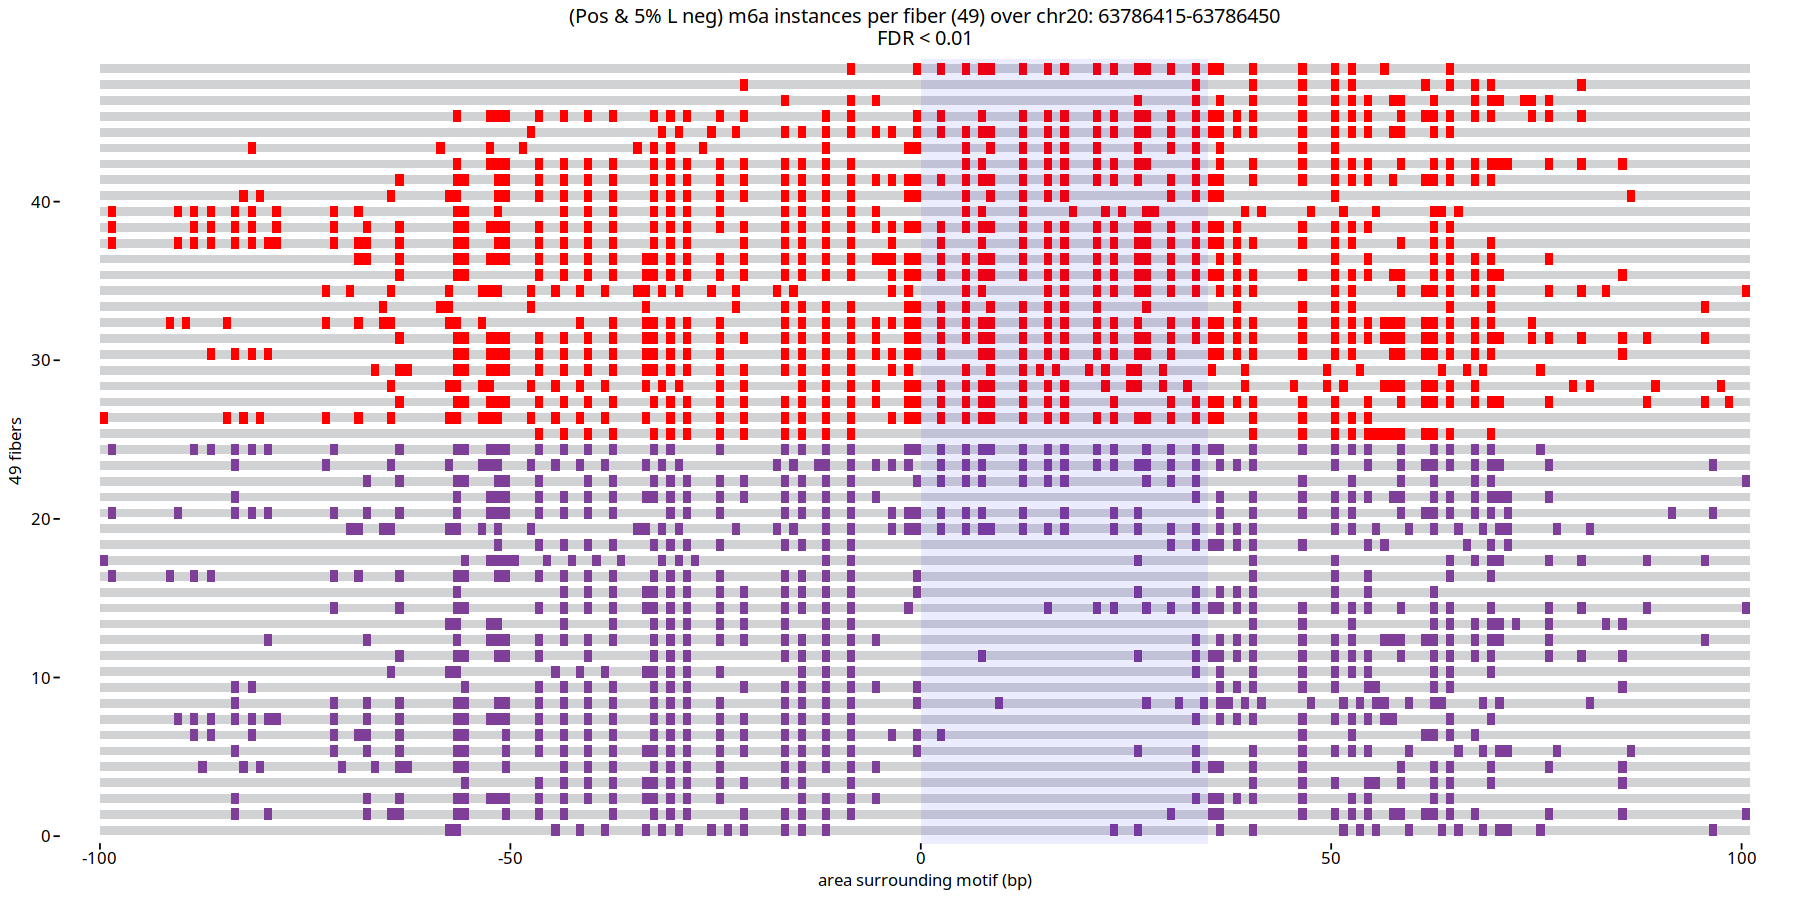

In [217]:
# plot (colored by FDR)

p <- ggplot(df_p) +
        geom_rect(aes(xmin=x_min, xmax=x_max, ymin=y_min, ymax=y_max), fill=fiber_col, data=df_fiber) +
        geom_rect(aes(xmin=centered_start, xmax=centered_end, ymin=y_min, ymax=y_max, group=FDR_group), fill=df_p$fill_col, data=df_p) +
        scale_color_identity() +
        # add box over motif location
        annotate("rect", xmin=0, xmax=35, ymin=-Inf, ymax=+Inf, alpha=0.075, fill="blue") +
        scale_y_continuous(limits=c(0, 49), expand=expansion(add=c(0.5,0)), name=y_axis_name) +
        ggtitle(plot_title) +
        scale_x_continuous(name=x_axis_name, expand=expansion(add=c(5, 5))) +
        theme_classic() +
            theme(text = font_info,
            axis.ticks = element_line(color="#000000", lineend="square"),
            axis.text = font_info,
            axis.line = element_blank(),
            panel.background = element_blank(),
            plot.title = element_text(family="ArialMT", size=12, hjust=0.5),
            legend.position = "none")
p

if (save_pdf == TRUE) {
    ggsave(output_file, plot = p, width=pdf_dims[1], height=pdf_dims[2])
}

#### FDR < 0.001

In [181]:
#------------ Set output file ------------
FDR <- 0.001
output_file_name <- sprintf("CTCF_%s.mokapot.m6a_per_fiber_FDR_%s.pdf", file_root, FDR)
output_file <- sprintf("%s/%s", output_folder, output_file_name)
print(output_file)

# save file
save_pdf <- TRUE
pdf_dims <- c(10,5)

[1] "/mmfs1/gscratch/stergachislab/mvollger/projects/ctcf-footprinting/mokapot_res/figures/CTCF_100bp_small_5_L.mokapot.m6a_per_fiber_FDR_0.001.pdf"


In [182]:
# make plotting data
df_p <- moka[, c("motif_query", "motif_name", "query_name", "centered_start", "centered_end", "FDR")]
     

In [183]:
# sort by FDR value
df_p <- df_p[order(df_p$FDR)]

# add col with y-axis coords
y_min <- seq(from=0, by=1, length.out=length(unique(df_p$query_name)))
y_max <- seq(from=0.75, by=1, length.out=length(unique(df_p$query_name)))

y_min_vals <- setNames(y_min, unique(df_p$query_name))
y_max_vals <- setNames(y_max, unique(df_p$query_name))

df_p <- df_p %>%
            mutate(
                y_min = y_min_vals[query_name],
                y_max = y_max_vals[query_name]
            )
dim(df_p)

[1] 1829    8

In [184]:
# get plot limits
x_min <- max(df_p$centered_start)
x_max <- min(df_p$centered_end)
# number of fibers
n_fibers <- length(unique(df_p$query_name))
n_fibers

# coords for fiber info
df_fiber <- df_p %>% 
                group_by(y_min, y_max) %>%
                summarise(
                    x_min = -100,
                    x_max = 101,     
                )

[1] 49

`summarise()` has grouped output by 'y_min'. You can override using the
`.groups` argument.


In [185]:
# set plot parameters
plot_title <- sprintf("(%s) m6a instances per fiber (%s) over %s: %s-%s\nFDR < %s",
                      "Pos & 5% L neg", length(unique(df_p$query_name)), motif_coords[1], motif_coords[2], motif_coords[3], FDR)
x_axis_name <- "area surrounding motif (bp)"
y_axis_name <- sprintf("%s fibers", length(unique(df_p$query_name)))
font_size <- 10
font_info <- element_text(size=font_size, family="ArialMT", color="black")

# grey
vline_col <- "#CECDCC"
# purple
m6a_col <- "#7F3F98"
# gray
fiber_col <- "#D1D2D4"

# colors from Mitchell's presentation
# orange, red, purple, light grey, navy (gene track)
mitch_cols <- c("#FF8C00", "#FF0000", "#9370DB", "#E6E6E6", "#0C0C78")

In [186]:
# add color based on FDR value
# purple, red
fill_cols <- c(m6a_col, mitch_cols[2])

df_p$fill_col <- ifelse(df_p$FDR <= FDR, fill_cols[1], fill_cols[2])
df_p$FDR_group <- ifelse(df_p$FDR <= FDR, "low_FDR", "high_FDR")

In [187]:
# change plot dimensions
options(repr.plot.width=20, repr.plot.height=10)

set_plot_dimensions <- function(width_choice, height_choice) {
        options(repr.plot.width=width_choice, repr.plot.height=height_choice)
        }

set_plot_dimensions(12, 6)

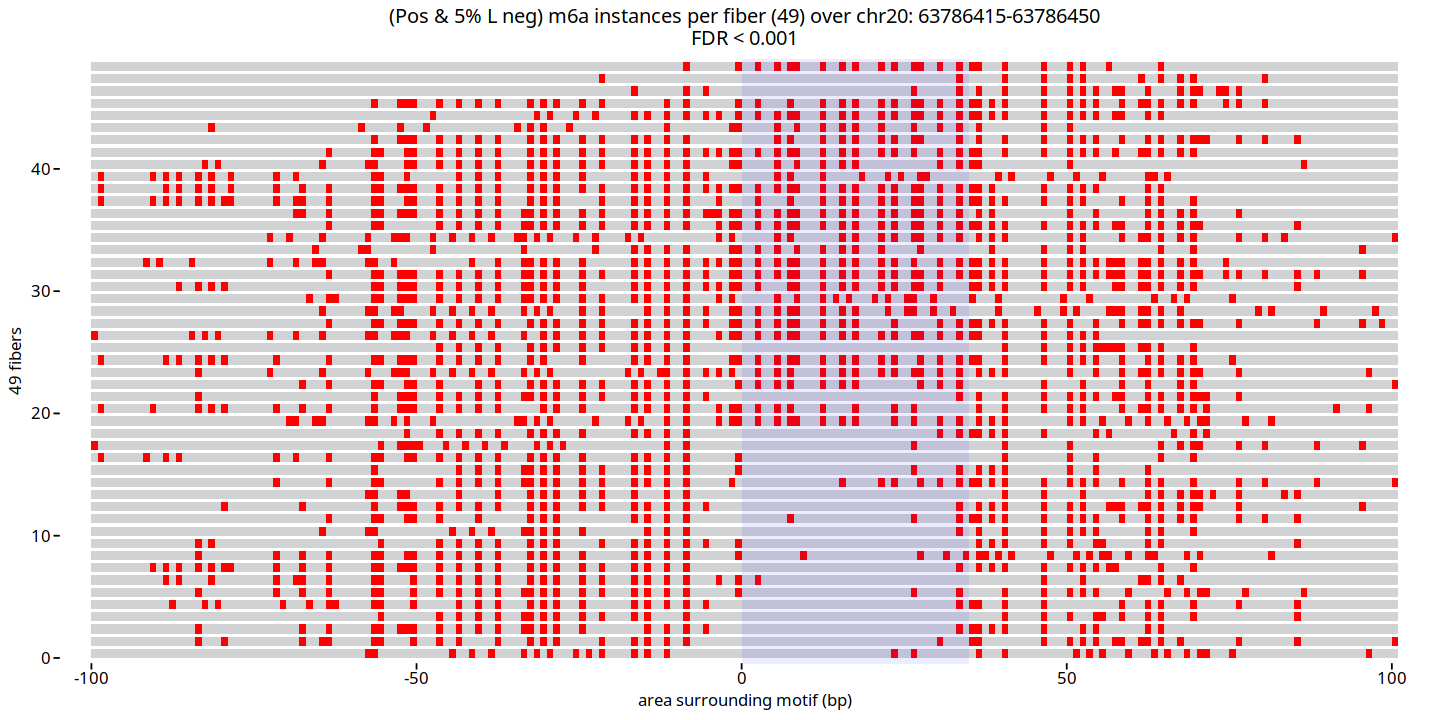

In [188]:
# plot (colored by FDR)

p <- ggplot(df_p) +
        geom_rect(aes(xmin=x_min, xmax=x_max, ymin=y_min, ymax=y_max), fill=fiber_col, data=df_fiber) +
        geom_rect(aes(xmin=centered_start, xmax=centered_end, ymin=y_min, ymax=y_max, group=FDR_group), fill=df_p$fill_col, data=df_p) +
        scale_color_identity() +
        # add box over motif location
        annotate("rect", xmin=0, xmax=35, ymin=-Inf, ymax=+Inf, alpha=0.075, fill="blue") +
        scale_y_continuous(limits=c(0, 49), expand=expansion(add=c(0.5,0)), name=y_axis_name) +
        ggtitle(plot_title) +
        scale_x_continuous(name=x_axis_name, expand=expansion(add=c(5, 5))) +
        theme_classic() +
            theme(text = font_info,
            axis.ticks = element_line(color="#000000", lineend="square"),
            axis.text = font_info,
            axis.line = element_blank(),
            panel.background = element_blank(),
            plot.title = element_text(family="ArialMT", size=12, hjust=0.5),
            legend.position = "none")
p

if (save_pdf == TRUE) {
    ggsave(output_file, plot = p, width=pdf_dims[1], height=pdf_dims[2])
}